#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Operaciones de Aprendizaje Automático**

###Tecnológico de Monterrey

## **Fase 1 Proyecto**
###**Regensburg Pediatric Appendicitis**

## **Equipo 32 - Nombres:**


# **Manipulación y preparación de datos**

## **Carga de datos**

In [43]:
!pip install ucimlrepo

In [44]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



In [45]:
# Cargamos datos de UCI
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

# Visualizamos las primeras filas
X.head()


,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,4.0,3.0,yes,7.1,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,5.0,4.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,5.0,3.0,no,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,7.0,6.0,no,NaN,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,5.0,6.0,yes,7.0,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


## **Verificación inicial**

In [46]:
# Información básica
X.info()

# Resumen estadístico de los datos numéricos
X.describe()

# Vemos si existen valores nulos
X.isnull().sum()

# Distribución de las variables objetivo
y.value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

Management                 Severity       Diagnosis      
conservative               uncomplicated  no appendicitis    313
                                          appendicitis       170
primary surgical           uncomplicated  appendicitis       154
                           complicated    appendicitis       114
secondary surgical         uncomplicated  appendicitis        21
                           complicated    appendicitis         4
primary surgical           complicated    no appendicitis      1
                           uncomplicated  no appendicitis      1
secondary surgical         uncomplicated  no appendicitis      1
simultaneous appendectomy  uncomplicated  no appendicitis      1
Name: count, dtype: int64


## Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de datos (EDA) es un paso crucial para comprender la estructura, tendencias y patrones de los datos. A continuación, realizamos visualizaciones y análisis estadísticos para detectar posibles valores atípicos, distribuciones y correlaciones importantes entre las variables.


In [47]:

# Revisar estadísticas descriptivas de los datos numéricos
X.describe()


,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000
mean,11.346451,18.907012,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.386900
std,3.529909,4.385331,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433854
min,0.000000,7.830000,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000
25%,9.200000,15.725000,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000
50%,11.440000,18.060000,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000
75%,14.100000,21.180000,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000
max,18.360000,38.160000,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000


<Figure size 1200x800 with 0 Axes>

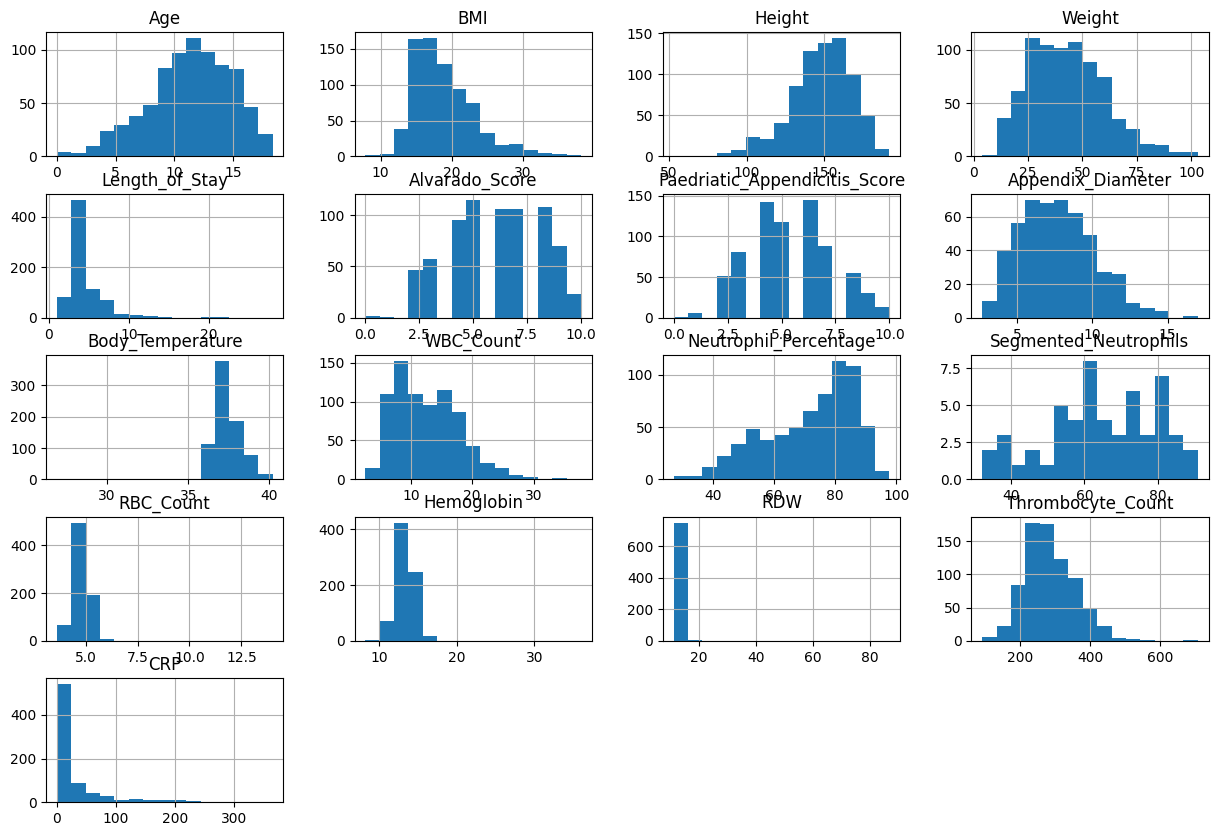

In [48]:
# Histograma de las características numéricas
plt.figure(figsize=(12, 8))
X.select_dtypes(include=[np.number]).hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.show()

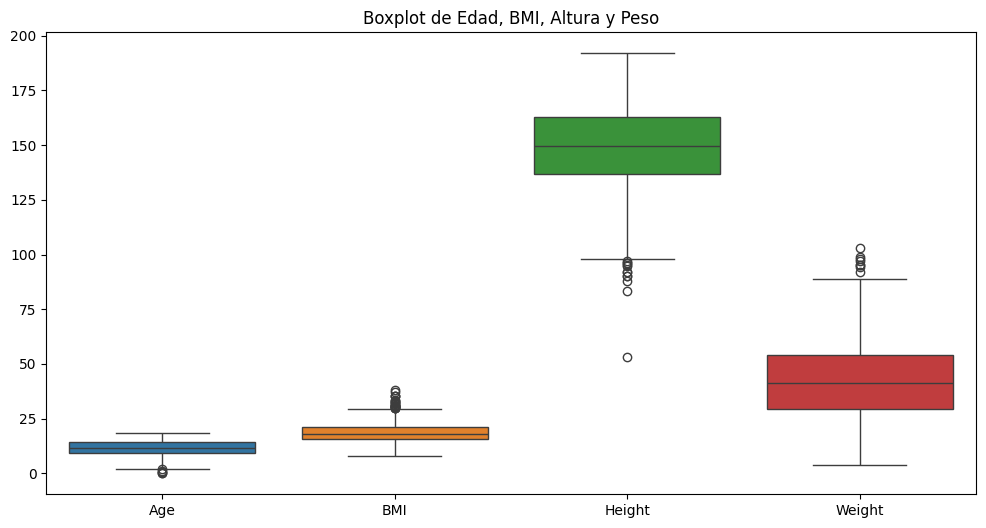

In [49]:

# Boxplot para detectar valores atípicos en variables numéricas clave
plt.figure(figsize=(12, 6))
sns.boxplot(data=X[['Age', 'BMI', 'Height', 'Weight']])
plt.title('Boxplot de Edad, BMI, Altura y Peso')
plt.show()


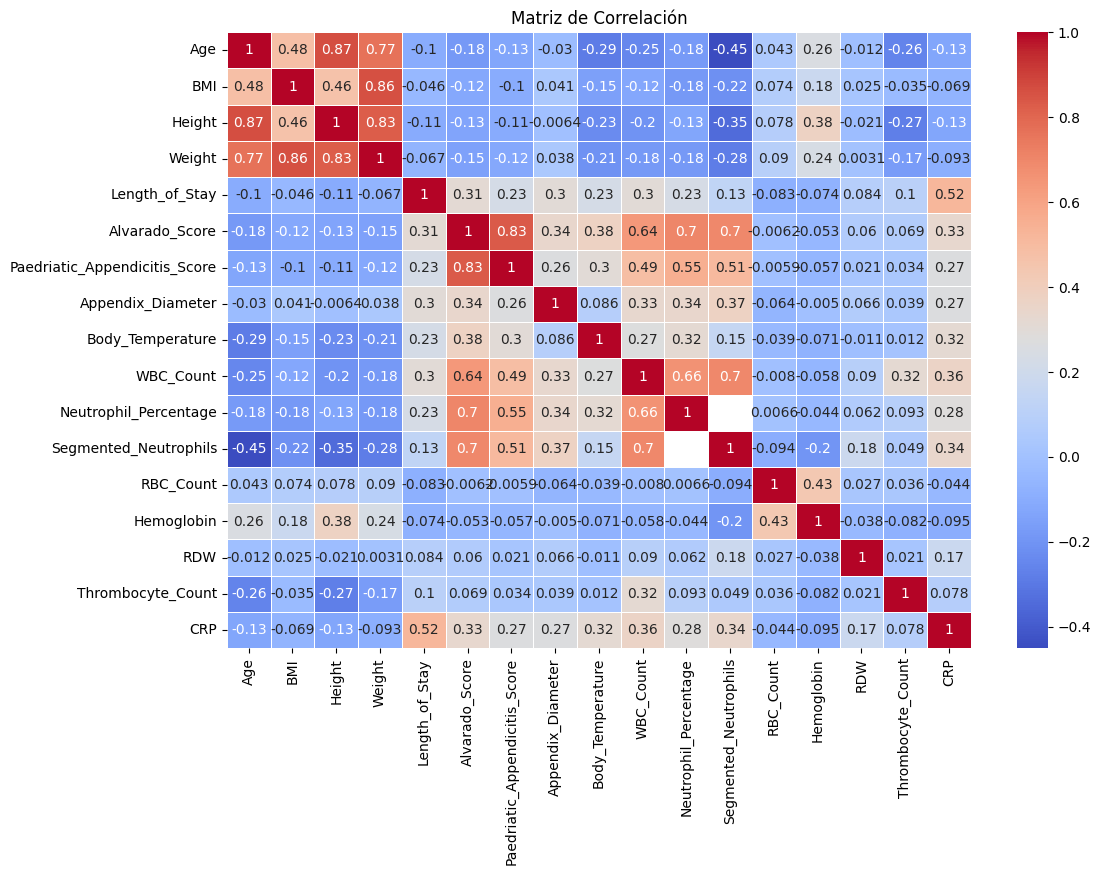

In [50]:
# Matriz de correlación para las variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(X.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

## **Limpieza de datos**

In [51]:
# Verificar cuántos valores nulos hay por columna
print(X.isnull().sum())


Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


In [52]:
# Imputar valores numéricos con la mediana
numeric_cols = X.select_dtypes(include=np.number).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# Para variables categóricas, usamos la moda
categorical_cols = X.select_dtypes(exclude=np.number).columns
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

<ipython-input-52-107fe5f175f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
<ipython-input-52-107fe5f175f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])


In [53]:
# Verificar que ya no hay filas vacías
print(X.isnull().sum())
print(X.shape)


Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Segmented_Neutrophils               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW                                 0
Thrombocyte_Count                   0
Ketones_in_Urine                    0
RBC_in_Urine

In [54]:
# Eliminamos duplicados
# Revisamos número de duplicados
X.duplicated().sum()
# Eliminar
X_clean = X.drop_duplicates()


In [55]:
print(X_clean.shape)


(782, 53)


Incluimos algunas transformaciones necesarias

In [56]:
# Convertir variables categóricas a variables numéricas
X_encoded = pd.get_dummies(X_clean, drop_first=True)

if X_encoded.empty:
    print("Error")
else:
    # Escalar las variables numéricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_encoded)

## **Dividimos datos en conjuntos de entrenamiento y prueba**

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Verificar el tamaño de los conjuntos
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")


Conjunto de entrenamiento: (547, 111)
Conjunto de prueba: (235, 111)


## **Visualización de datos**

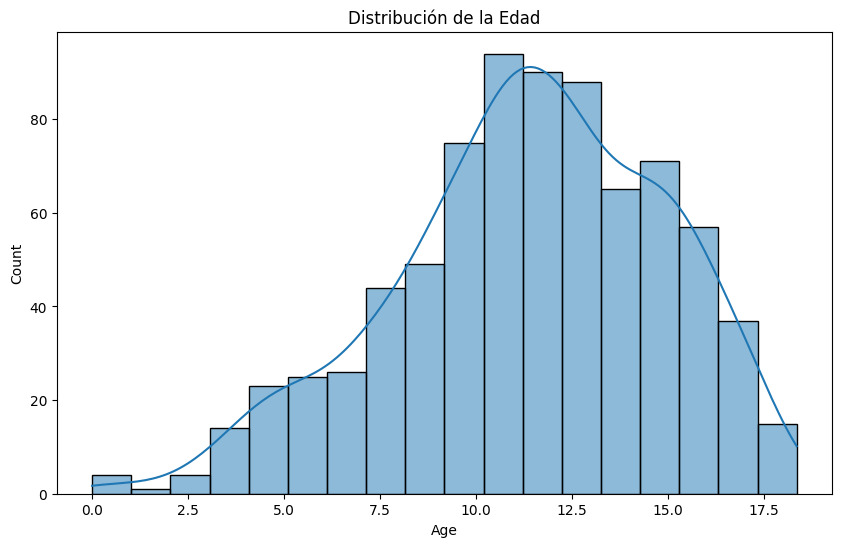

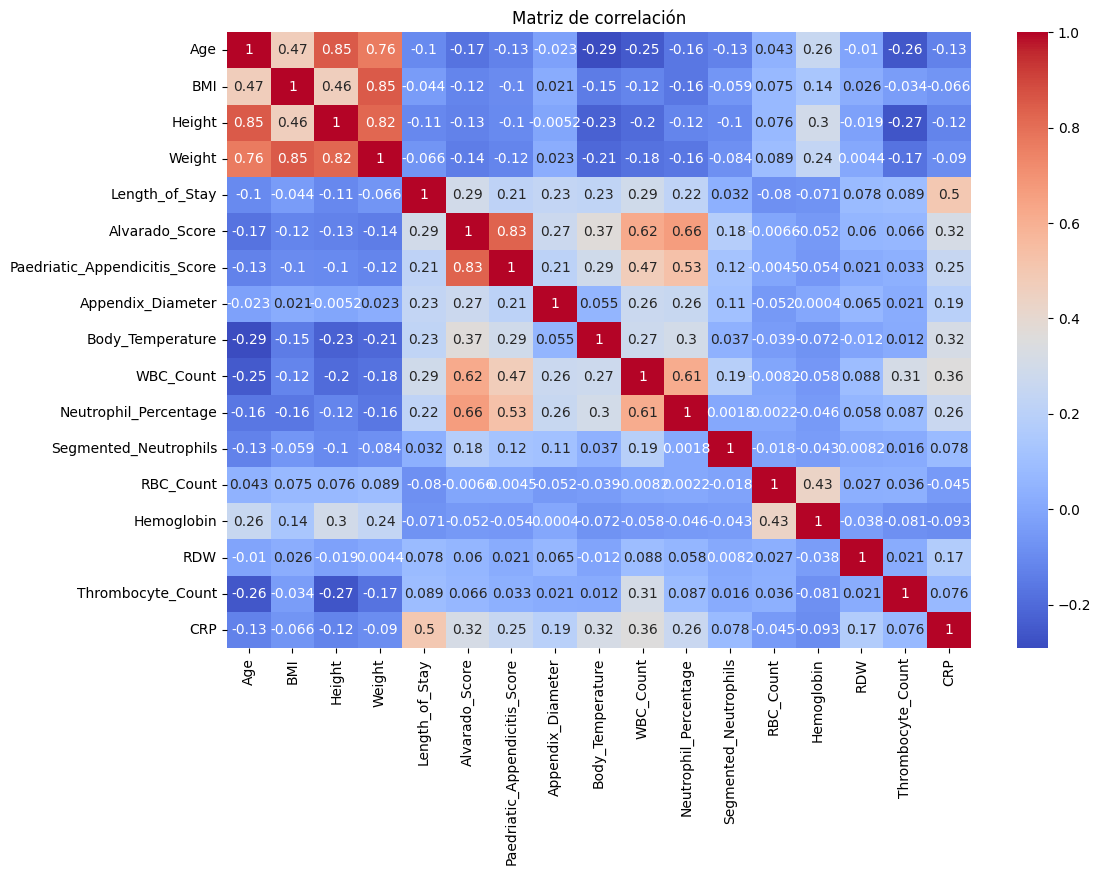

In [58]:
# Distribución de algunas características
plt.figure(figsize=(10, 6))
sns.histplot(X_clean['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 8))

numerical_features = X_clean.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


## **Guardamos datos**

In [59]:
# Guardar los datos limpios y preparados en un archivo CSV
X_train_df = pd.DataFrame(X_train, columns=X_encoded.columns)
#X_train_df.to_csv('X_train_prepared.csv', index=False)


## **Exploracion de los datos**

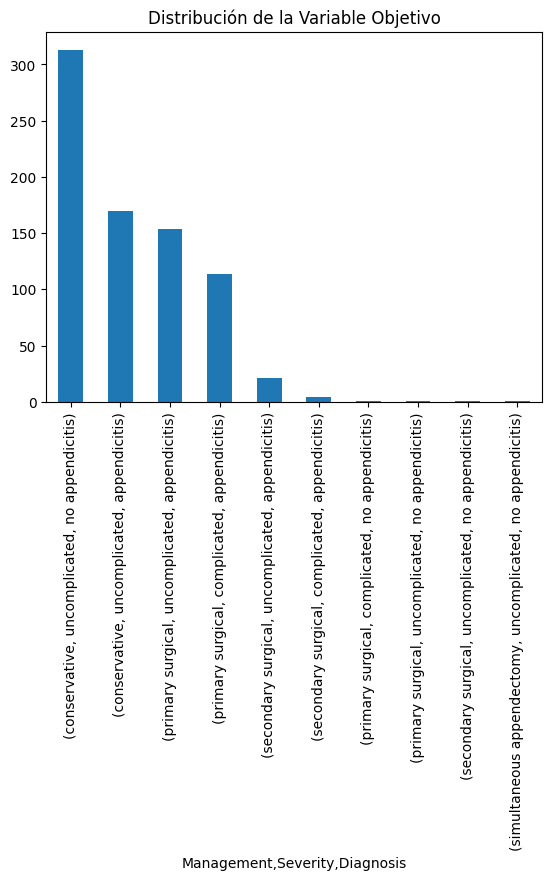

In [60]:
# Resumen estadístico de los datos numéricos
X.describe()

# Resumen de las variables categóricas
X.select_dtypes(include=['object']).describe()

# Distribución de la variable objetivo
y.value_counts().plot(kind='bar')
plt.title('Distribución de la Variable Objetivo')
plt.show()


Visualización de distribuciones

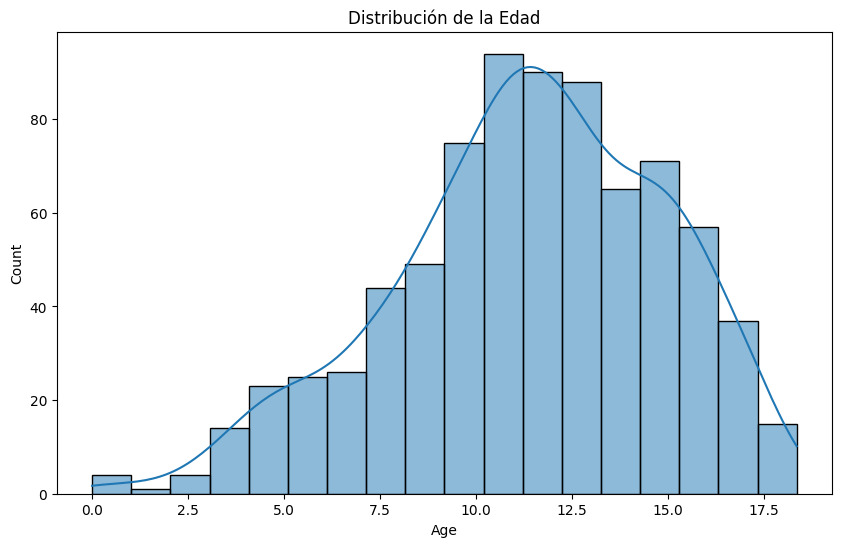

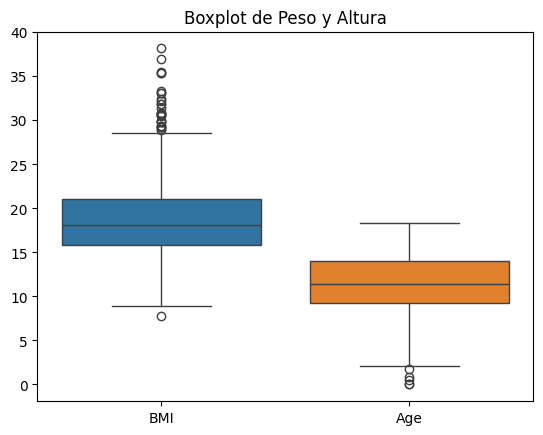

In [61]:
# Distribución de algunas características numéricas
plt.figure(figsize=(10, 6))
sns.histplot(X['Age'], kde=True)  # Ejemplo con la columna 'Edad'
plt.title('Distribución de la Edad')
plt.show()

# Visualización de la distribución de otra variable
sns.boxplot(data=X[['BMI', 'Age']])
plt.title('Boxplot de Peso y Altura')
plt.show()

Correlaciones

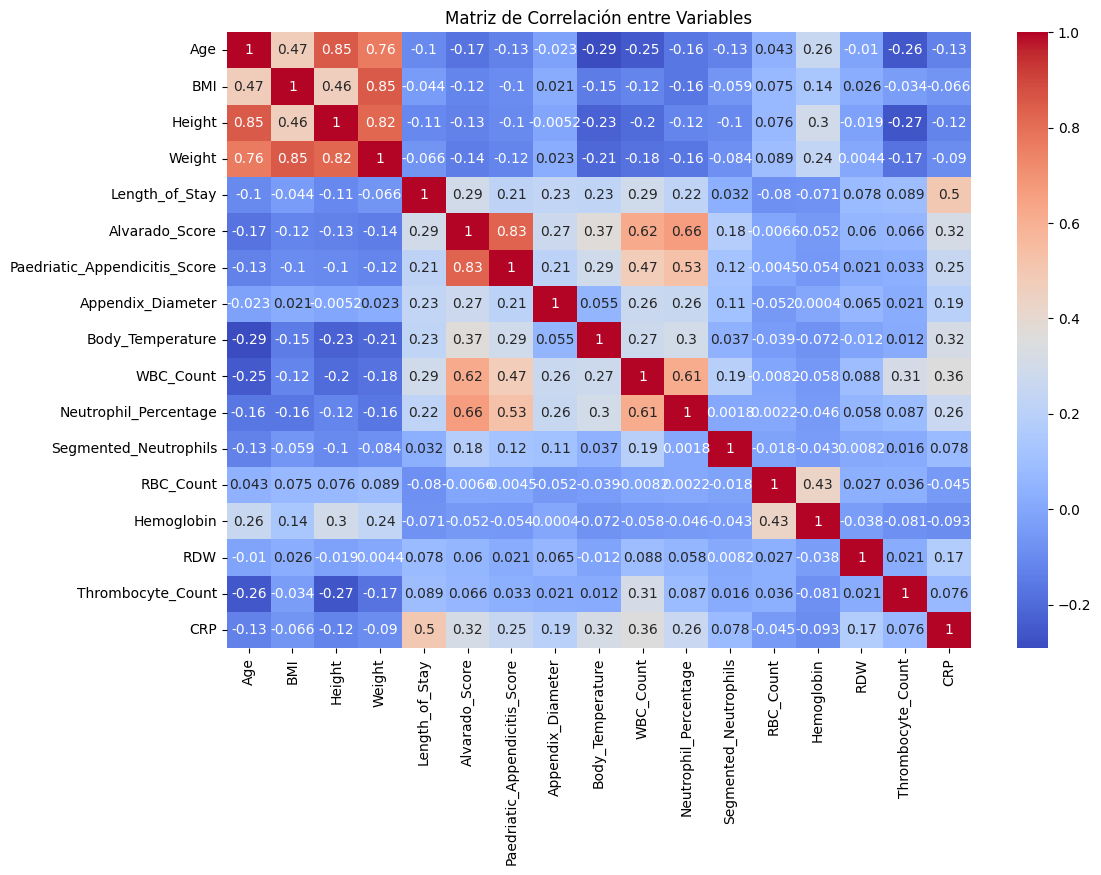

In [62]:
# Calcular la matriz de correlación solo para columnas numéricas
corr_matrix = X.select_dtypes(include=np.number).corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables')
plt.show()

## **Preprocesamiento de los datos**

In [63]:
# Normalizar las variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))  # Solo aplicar a columnas numéricas

# Convertir de nuevo a DataFrame para fácil manipulación
X_scaled_df = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=[np.number]).columns)


In [64]:
# Usar One-Hot Encoding para variables categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Verificar el resultado
X_encoded.head()


,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,...,Gynecological_Findings_Ovarialzyste,Gynecological_Findings_Ovarialzyste re.,Gynecological_Findings_Ovarialzysten,Gynecological_Findings_V. a. Ovarialtorsion,Gynecological_Findings_Zyste Uterus,Gynecological_Findings_ja,Gynecological_Findings_kein Anhalt für eine gynäkologische Ursache der Beschwerden,Gynecological_Findings_keine,Gynecological_Findings_kleine Ovarzyste rechts,Gynecological_Findings_unauffällig
0,12.68,16.9,148.0,37.0,3.0,4.0,3.0,7.1,37.0,7.7,...,False,False,False,False,False,False,False,True,False,False
1,14.10,31.9,147.0,69.5,2.0,5.0,4.0,7.5,36.9,8.1,...,False,False,False,False,False,False,False,True,False,False
2,14.14,23.3,163.0,62.0,4.0,5.0,3.0,7.5,36.6,13.2,...,False,False,False,False,False,False,False,True,False,False
3,16.37,20.6,165.0,56.0,3.0,7.0,6.0,7.5,36.0,11.4,...,False,False,False,False,False,False,False,True,False,False
4,11.08,16.9,163.0,45.0,3.0,5.0,6.0,7.0,36.9,8.1,...,False,False,False,False,False,False,False,True,False,False


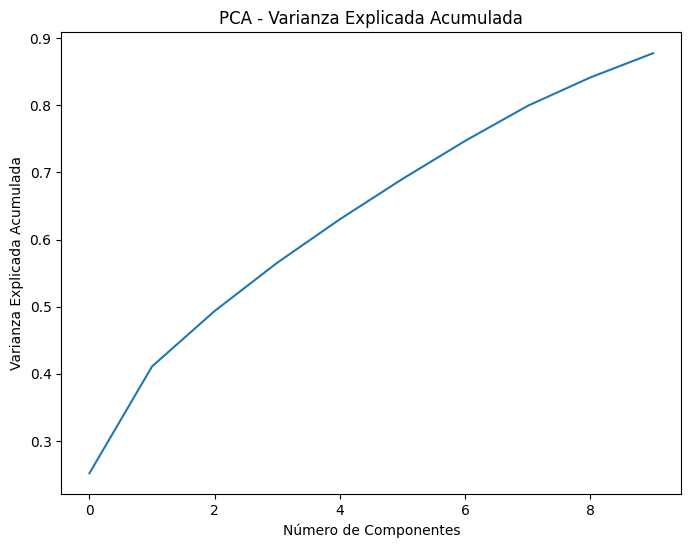

In [65]:
# Aplicar PCA para reducir dimensionalidad
from sklearn.decomposition import PCA # import the PCA class from the sklearn.decomposition module
pca = PCA(n_components=10)  # Elegir el número de componentes principales
X_pca = pca.fit_transform(X_scaled)

# Visualizar la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA - Varianza Explicada Acumulada')
plt.show()

## **Preparación de los datos**

In [66]:
# Concatenar las variables numéricas normalizadas con las categóricas codificadas (si no aplicas PCA)
X_final = pd.concat([pd.DataFrame(X_scaled_df), X_encoded], axis=1)

# Visualizar el conjunto de datos final
X_final.head()


,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,...,Gynecological_Findings_Ovarialzyste,Gynecological_Findings_Ovarialzyste re.,Gynecological_Findings_Ovarialzysten,Gynecological_Findings_V. a. Ovarialtorsion,Gynecological_Findings_Zyste Uterus,Gynecological_Findings_ja,Gynecological_Findings_kein Anhalt für eine gynäkologische Ursache der Beschwerden,Gynecological_Findings_keine,Gynecological_Findings_kleine Ovarzyste rechts,Gynecological_Findings_unauffällig
0,0.378236,-0.458998,-0.003700,-0.355440,-0.497573,-0.925729,-1.182134,-0.279963,-0.447802,-0.929393,...,False,False,False,False,False,False,False,True,False,False
1,0.781027,3.022184,-0.055271,1.518105,-0.887065,-0.445357,-0.653587,-0.082550,-0.559005,-0.854526,...,False,False,False,False,False,False,False,True,False,False
2,0.792374,1.026306,0.769871,1.085749,-0.108081,-0.445357,-1.182134,-0.082550,-0.892617,0.100035,...,False,False,False,False,False,False,False,True,False,False
3,1.424927,0.399694,0.873014,0.739863,-0.497573,0.515386,0.403507,-0.082550,-1.559840,-0.236869,...,False,False,False,False,False,False,False,True,False,False
4,-0.075614,-0.458998,0.769871,0.105740,-0.497573,-0.445357,0.403507,-0.329316,-0.559005,-0.854526,...,False,False,False,False,False,False,False,True,False,False


## **Entrenamiento de modelos**

Regresión logística

In [67]:
# Eliminar las filas donde la variable objetivo es NaN
y_train_clean = y_train.dropna(subset=['Severity'])
y_test_clean = y_test.dropna(subset=['Severity'])

# Asegúrate de que las filas correspondientes en X_train y X_test también se eliminen
X_train_clean = X_train.loc[y_train_clean.index]
X_test_clean = X_test.loc[y_test_clean.index]


In [68]:
# Asegúrate de que y_train y y_test no contengan tipos de datos mixtos
print(y_train_clean['Severity'].unique())  # Revisa los valores únicos de la variable objetivo
print(y_test_clean['Severity'].unique())


['uncomplicated' 'complicated']
['complicated' 'uncomplicated']


In [69]:
# Modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
# Select the appropriate target variable column from y_train
log_reg.fit(X_train_clean, y_train_clean['Severity']) # Use the cleaned training data

# Evaluación del modelo
y_pred_log = log_reg.predict(X_test_clean) # Use the cleaned test data for prediction
print("Accuracy de Regresión Logística:", accuracy_score(y_test_clean['Severity'], y_pred_log)) # Compare with the cleaned target variable
print(classification_report(y_test_clean['Severity'], y_pred_log))

Accuracy de Regresión Logística: 0.9230769230769231
               precision    recall  f1-score   support

  complicated       0.78      0.69      0.74        36
uncomplicated       0.95      0.96      0.95       198

     accuracy                           0.92       234
    macro avg       0.86      0.83      0.85       234
 weighted avg       0.92      0.92      0.92       234



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random forest

In [70]:
# Modelo de Random Forest
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_clean, y_train_clean['Severity'])

# Evaluación del modelo

y_pred_rf = rf.predict(X_test_clean)
print("Accuracy de Random Forest:", accuracy_score(y_test_clean['Severity'], y_pred_rf))
print(classification_report(y_test_clean['Severity'], y_pred_rf))


Accuracy de Random Forest: 0.9145299145299145
               precision    recall  f1-score   support

  complicated       0.77      0.64      0.70        36
uncomplicated       0.94      0.96      0.95       198

     accuracy                           0.91       234
    macro avg       0.85      0.80      0.82       234
 weighted avg       0.91      0.91      0.91       234



SVM

In [71]:
# Modelo de SVM
svm = SVC()
# Select the appropriate target variable column from y_train
svm.fit(X_train_clean, y_train_clean['Severity']) # Assuming 'Severity' is your target variable

# Evaluación del modelo
y_pred_svm = svm.predict(X_test_clean)
print("Accuracy de SVM:", accuracy_score(y_test_clean['Severity'], y_pred_svm)) # Select the 'Severity' column from y_test_clean
print(classification_report(y_test_clean['Severity'], y_pred_svm)) # Select the 'Severity' column from y_test_clean

Accuracy de SVM: 0.8504273504273504
               precision    recall  f1-score   support

  complicated       0.53      0.25      0.34        36
uncomplicated       0.88      0.96      0.92       198

     accuracy                           0.85       234
    macro avg       0.70      0.60      0.63       234
 weighted avg       0.82      0.85      0.83       234



Ajuste de hiperparámetros

In [72]:
# GridSearch para Regresión Logística
param_grid_log = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5)
grid_log.fit(X_train_clean, y_train_clean['Severity'])
# Mejor modelo y evaluación
best_log = grid_log.best_estimator_
y_pred_best_log = best_log.predict(X_test_clean)
print("Mejor Accuracy de Regresión Logística:", accuracy_score(y_test_clean['Severity'], y_pred_best_log))
print(classification_report(y_test_clean['Severity'], y_pred_best_log))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mejor Accuracy de Regresión Logística: 0.9230769230769231
               precision    recall  f1-score   support

  complicated       0.80      0.67      0.73        36
uncomplicated       0.94      0.97      0.96       198

     accuracy                           0.92       234
    macro avg       0.87      0.82      0.84       234
 weighted avg       0.92      0.92      0.92       234



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
# GridSearch para Random Forest
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, 30]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train_clean, y_train_clean['Severity'])

# Mejor modelo y evaluación
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_clean)
print("Mejor Accuracy de Random Forest:", accuracy_score(y_test_clean['Severity'], y_pred_best_rf))
print(classification_report(y_test_clean['Severity'], y_pred_best_rf))


Mejor Accuracy de Random Forest: 0.9102564102564102
               precision    recall  f1-score   support

  complicated       0.76      0.61      0.68        36
uncomplicated       0.93      0.96      0.95       198

     accuracy                           0.91       234
    macro avg       0.85      0.79      0.81       234
 weighted avg       0.91      0.91      0.91       234



In [74]:
# GridSearch para Random Forest
param_grid_rf = {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, 30]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train_clean, y_train_clean['Severity'])

# Mejor modelo y evaluación
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_clean)
print("Mejor Accuracy de Random Forest:", accuracy_score(y_test_clean['Severity'], y_pred_best_rf))
print(classification_report(y_test_clean['Severity'], y_pred_best_rf)) #

Mejor Accuracy de Random Forest: 0.9102564102564102
               precision    recall  f1-score   support

  complicated       0.76      0.61      0.68        36
uncomplicated       0.93      0.96      0.95       198

     accuracy                           0.91       234
    macro avg       0.85      0.79      0.81       234
 weighted avg       0.91      0.91      0.91       234



## **Evaluación de modelos**

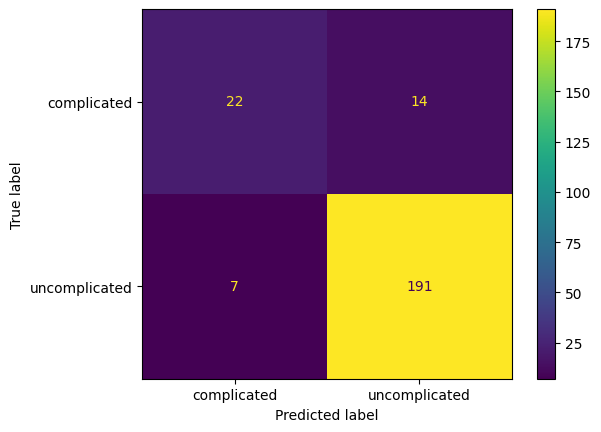

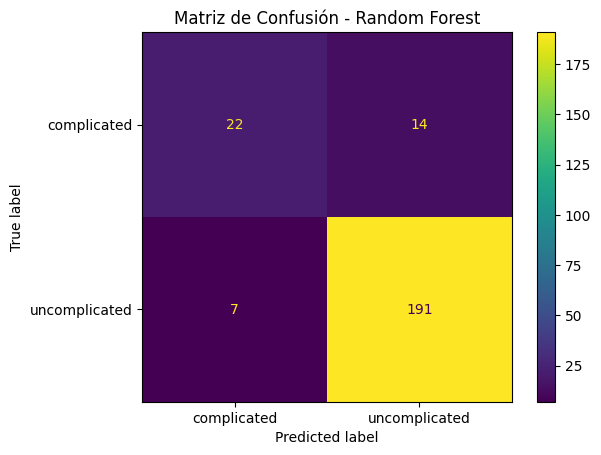

In [75]:
disp = ConfusionMatrixDisplay.from_estimator(best_rf, X_test_clean, y_test_clean['Severity'])
disp.plot()
plt.title('Matriz de Confusión - Random Forest')
plt.show()
